# Elijah Tamarchenko
## Networks Midterm spring 2022

### Problem 1
Using the formula $\frac{2L_i}{k_i(k_i-1)}$, we count 4 triangles in the neighbors of the central node, and thus the clustering coefficient would be $\frac{4}{21} \approx 0.19$

### Problem 2

$\textit{ See Paper}$

### Problem 3

Ring: If the arrow are all facing in on direction, then the outdegree and indegree of each node should be 1 without shortcuts. When we add the 2 shortcuts, there will be 2 nodes with in degree 2 and 2 nodes with outdegree 2, and the rest will have both in and outdegree 1.

Thus there will be N - 2 nodes with in and out degree 1, and 2 nodes with in and out degree 2

Binary Tree: If the edges are facing downards in the tree, each node will have outdegree 2 (besides the leaves of the tree, with out degree 0), and each node will have in-degree 1 (besides the root node).

Thus there will be N - 1nodes with in degree 1, and 1 node with in degree 0, and N/2 nodes with out degree 2, and N/2 nodes with out degree 0.


### Problem 4
The clustering coefficient at the hubs would decrease, since before the hubs were all connected to each other, and thus they formed lots of triangles and had a large clustering coefficient, but now all the hubs are connected to nodes with smaller degrees with a smaller chance of connected to each other, thus making the clustering coefficient small

### Problem 5
We know that the formula for the clustering coefficient is $C_i \equiv \frac{2L_i}{k_i(k_i - 1)}$ where $L_i$ is the number of triangles. We can thus fill in for $k$, and what we have left to estimate is the average number of of triangles. We can calculate the chances that the two neighbors of a node are connected to each other, which is $\frac{10}{149}$. We know that there are $\frac{10*9}{1}$ possible pairs of nodes, and thus our formula would be $C_i \equiv \frac{2*\frac{10}{149}*\frac{10*9}{2}}{10*9} = \frac{10}{149} \approx 0.067$

### Problem 6

Average "Average Clustering coefficient": 0.06695406835247278


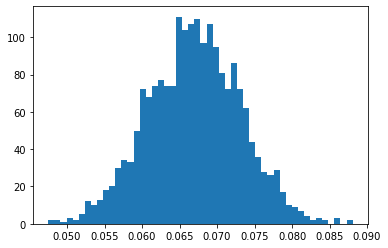

In [7]:
import networkx
import matplotlib.pyplot as plt
import statistics
# Number of iterations
num = 2000

deg, clust = [], []
# Run the simulation num times
for i in range(0, num):
    # Create an Erdos-Renyi graph with N = 150 and k = 10
    g = networkx.erdos_renyi_graph(150, 0.06711409395)
    # Get the average clustering coefficient for the graph
    clust.append(networkx.average_clustering(g))
# Histogram plot of the average clustering coefficients
plt.hist(clust, bins = int(num/40))
mean = statistics.mean(clust)
print(f'Average "Average Clustering coefficient": {mean}')

As we can see, the average clustering coefficient is 0.067, and the histogram also shows that with 2000 simulations, the center falls very obviously at 0.067 with a bell curve distribution. Thus our estimate is a good estimate.

### Problem 7
$\textit{See Image}$

### Problem 8

Words length histogram:


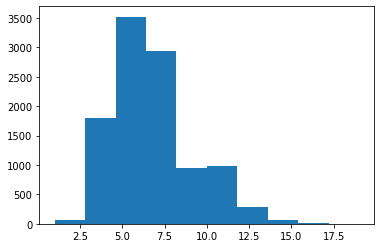

In [9]:
import networkx
import matplotlib.pyplot as plt
graph = networkx.read_edgelist('word_association_graph_DSF.txt', 
                               create_using=networkx.DiGraph(), 
                               nodetype=str, data=[('weight', float),])
words = [len(node) for node in list(graph.nodes)]
plt.hist(words)
print('Words length histogram:')

The distribution is centered at around 5 and is skewed to the right, meaning that most words that we see are short words, with fewer long words, decreasing the longer the words becomes.

### Problem 9

<BarContainer object of 19 artists>

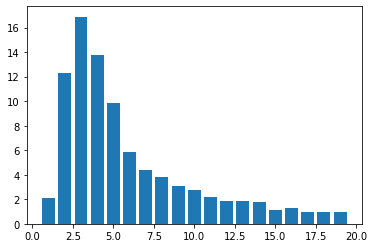

In [28]:
dict = {}

for word in list(graph.nodes):
    if len(word) in dict:
        dict[len(word)].append(graph.in_degree(word))
    else:
        dict[len(word)] = [graph.in_degree(word)]
for k, v in dict.items():
    dict[k] = statistics.mean(v)

plt.bar(*zip(*dict.items()))

We can see that the average in-degree of the words seems to be somewhat correlated with the length of the words, since ther smaller words which are more common also seem to have a higher in degree. This might mean that people are more likely to know smaller words, and thus when asked to associate a word they will come up with shorter words more often than longer ones, since they have fewer longer words in their vocabulary.